<a href="https://colab.research.google.com/github/rickiepark/the-ml-book/blob/main/Ch09~01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 밀도 추정

In [1]:
import numpy as np
import scipy as sp

mu1, sigma1 = 3.0, 1.0
mu2, sigma2 = 8.0, 1.5

def sum_pdf(x):
    result = []
    for i in range(len(x)):
        result.append((sp.stats.norm.pdf(x, mu1, sigma1)[i] +
                       sp.stats.norm.pdf(x, mu2, sigma2)[i])/2.0)
    return result

def sample_points():
    s1 = np.random.normal(mu1, sigma1, 50)
    s2 = np.random.normal(mu2, sigma2, 50)
    return np.concatenate((s1, s2))

x = sample_points()
X = x.reshape(-1, 1)
X.shape

(100, 1)

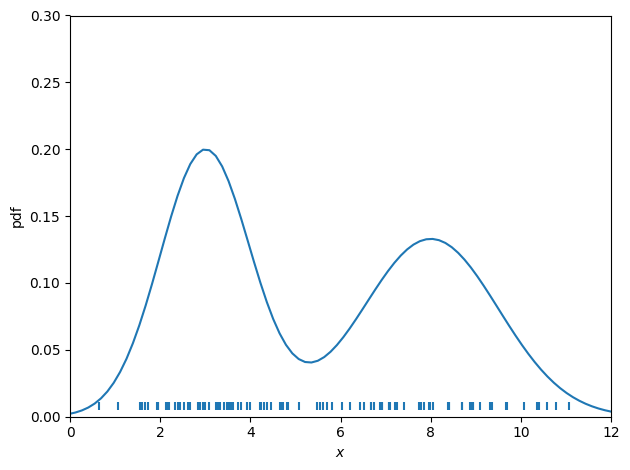

In [2]:
import matplotlib.pyplot as plt

x_plot = np.linspace(-2, 12, 100)

axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,0.3])
plt.scatter(X, [0.005] * len(X), s=30, marker=2)
plt.plot(x_plot, sum_pdf(x_plot), label="true pdf")
plt.xlabel("$x$")
plt.ylabel("pdf")
plt.tight_layout()
plt.show()

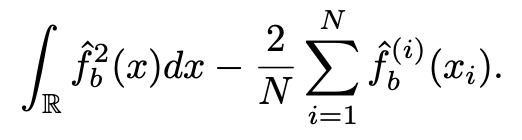

In [3]:
from sklearn.neighbors import KernelDensity
import scipy.integrate as integrate

loss = []
bandwidth = np.linspace(0.01, 3.0, 100)

for b in bandwidth:
    kde = KernelDensity(kernel='gaussian', bandwidth=b).fit(X)
    def f_sq(x):
        log_score = kde.score_samples([[x]])
        return np.exp(log_score[0])**2

    left_term, error = integrate.quad(f_sq, -np.inf, np.inf, limit=500)

    loo_densities = []
    for i in range(len(X)):
        # i번째 샘플을 제외한 데이터로 학습
        X_sub = np.delete(X, i, axis=0)
        # 기존 kde의 파라미터(kernel, bandwidth)를 그대로 사용
        kde_sub = KernelDensity(kernel='gaussian', bandwidth=b).fit(X_sub)

        # 제외했던 i번째 샘플에서의 밀도값 계산
        log_dens_i = kde_sub.score_samples(X[i:i+1])
        loo_densities.append(np.exp(log_dens_i[0]))

    right_term = 2 * np.mean(loo_densities)

    loss.append(left_term - right_term)

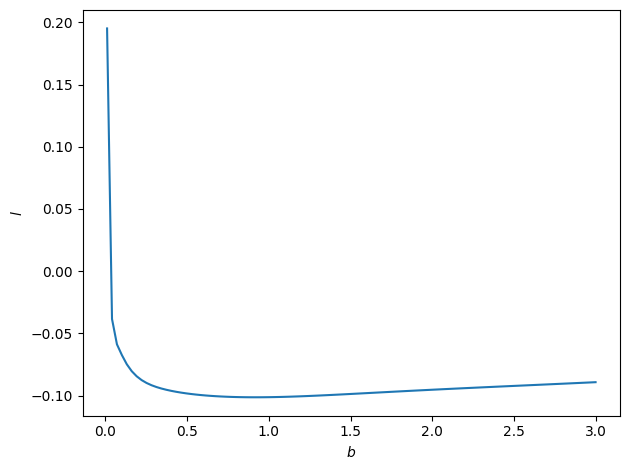

In [4]:
plt.plot(bandwidth, loss)
plt.xlabel("$b$")
plt.ylabel("$l$")
plt.tight_layout()
plt.xticks(np.arange(0, 3.5, 0.5))
plt.show()

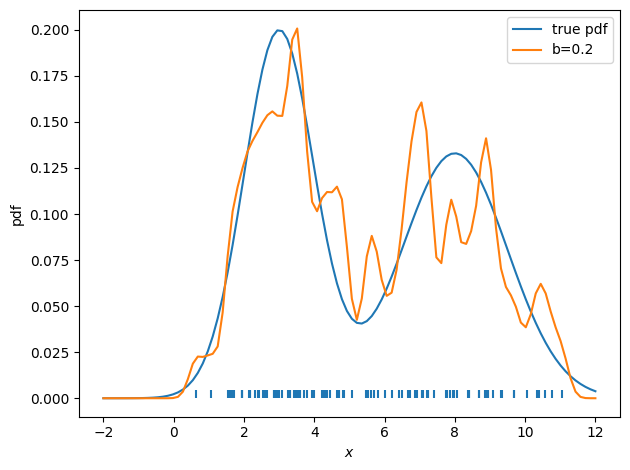

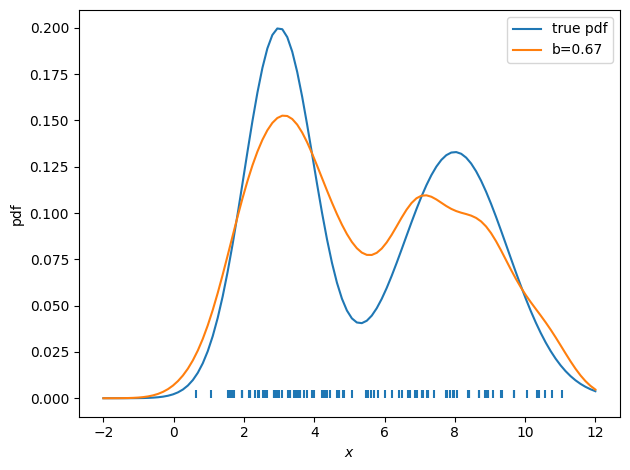

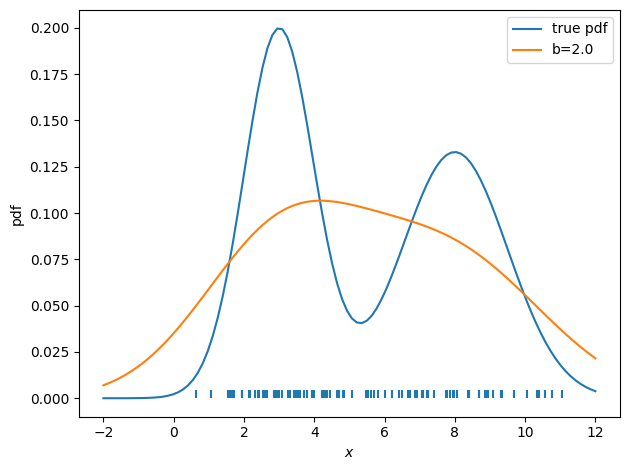

In [5]:
for b in [0.2, 0.67, 2.0]:
    densities = []
    kde = KernelDensity(kernel='gaussian', bandwidth=b).fit(X)
    for x in x_plot:
        den = np.exp(kde.score_samples([[x]])[0])
        densities.append(den)

    axes = plt.gca()
    plt.scatter(X, [0] * len(X), s=30, marker=2)
    plt.plot(x_plot, sum_pdf(x_plot), label="true pdf")
    plt.plot(x_plot, densities, label="b="+str(b))
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("pdf")
    plt.tight_layout()
    plt.show()